Saving sales-of-shampoo-over-a-three-ye (1).csv to sales-of-shampoo-over-a-three-ye (1).csv


<ipython-input-1-e041356ef47c>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='2001-01-01', periods=len(df), freq='M')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-1-e041356ef47c>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df.index[-1] 

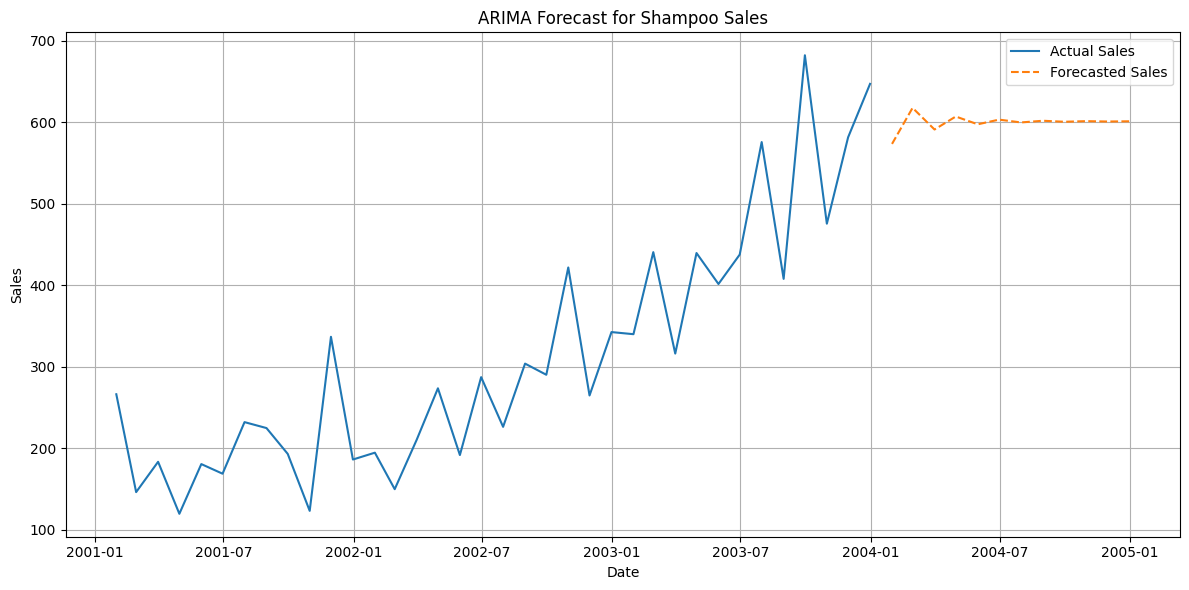

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                Wed, 23 Apr 2025   AIC                            406.782
Time:                        18:33:01   BIC                            411.448
Sample:                    01-31-2001   HQIC                           408.393
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003      0.201     -2.980      0.003      -0.995      -0.205
ma.L1         -0.2756      0.267     -1.033      0.302      -0.799       0.248
sigma2      5382.0426   1386.817      3.881      0.0

In [1]:
# Step 1: Install required library
!pip install statsmodels

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 3: Upload the CSV
from google.colab import files
uploaded = files.upload()

# Step 4: Load dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.columns = ['Month', 'Sales']
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df = df.dropna()

# Step 5: Fix datetime index
df['Month'] = pd.date_range(start='2001-01-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)

# Step 6: Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(df['Sales'], order=(1, 1, 1))
arima_result = model.fit()

# Step 7: Forecast next 12 months
forecast = arima_result.forecast(steps=12)
forecast_index = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Step 8: Plot actual and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(forecast_index, forecast, label='Forecasted Sales', linestyle='--')
plt.title('ARIMA Forecast for Shampoo Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Display model summary
print(arima_result.summary())
